# **Projeto ADA Estatística**


**Descrição**


Proposta do projeto. Ao longo do módulo de Estatística I, temos visto diversos conceitos
fundamentais envolvendo estatística descritiva, probabilidade e distribuições, inferência,
amostragem, testes estatísticos de hipótese e afins. Todo esse conhecimento faz parte de
um arcabouço bastante importante para as carreiras de Dados, e podem servir como
ferramentas relevantes para incrementar e melhor fundamentar diversas etapas do ciclo de
modelagem dos problemas que podemos tratar.


**Objetivo**

Isto posto, a proposta do projeto final é desenvolver uma análise exploratória de dados
(EDA) com enfoque na avaliação de relações entre as variáveis medidas e uma variável
dependente, a qual constitui aquilo que geralmente se costuma objetivar prever em uma
base de dados.
Alguns destes enfoques podem envolver, por exemplo: a modelagem de comportamentos
probabilísticos/estocásticos, análises de correlações e variância ou aplicação de testes
estatísticos de hipótese. Estes são apenas alguns exemplos, dentre tantas outras
possibilidades, de linhas de desenvolvimento da EDA do projeto.

**Dados**

A fonte de dados escolhida para o projeto foi Geração Usina, disponível em https://dados.ons.org.br/dataset/geracao-usina-2


**Entregáveis**

Como entregáveis, o grupo deverá: (i) fornecer um notebook com a EDA, bem
documentado, com a explanação do raciocínio e etapas de análise/processamento de
dados; e (ii) realizar uma apresentação curta, resumida, de até 20 minutos, sobre a análise.
Lembrem-se de que a apresentação deverá destacar os principais insights e raciocínios, e o
notebook será avaliado em mais detalhes posteriormente.



Grupo:

Juliana de Lima

Rafael Assis

Paulo Paixão

Vanderlandio da Rocha

Helouise Dayane

Patricia Adania

Leonardo Luiz





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns



In [ ]:
df_19 =  pd.read_csv('GERACAO_USINA_2019.csv', low_memory=False, delimiter=';')
df_20 = pd.read_csv('GERACAO_USINA_2020.csv', low_memory=False, delimiter=';')

In [ ]:
# Unir dataframes
df = pd.concat([df_19, df_20])

In [ ]:
df_19

,din_instante,id_subsistema,nom_subsistema,id_estado,nom_estado,cod_modalidadeoperacao,nom_tipousina,nom_tipocombustivel,nom_usina,ceg,val_geracao
0,2019-01-01 00:00:00,N,NORTE,AM,AMAZONAS,TIPO I,HIDROELÉTRICA,Hidráulica,Balbina,UHE.PH.AM.000190-2.01,82.993
1,2019-01-01 00:00:00,N,NORTE,AM,AMAZONAS,TIPO III,TÉRMICA,Óleo Diesel,Flores 4,UTE.PE.AM.029192-7.01,14.032
2,2019-01-01 00:00:00,N,NORTE,AM,AMAZONAS,TIPO I,TÉRMICA,Gás,Ponta Negra,UTE.GN.AM.029361-0.02,65.343
3,2019-01-01 00:00:00,N,NORTE,AM,AMAZONAS,TIPO I,TÉRMICA,Gás,Tambaqui,UTE.PE.AM.029276-1.01,50.980
4,2019-01-01 00:00:00,N,NORTE,AM,AMAZONAS,TIPO III,TÉRMICA,Óleo Combustível,Distrito A,UTE.PE.AM.030273-2.01,0.000
...,...,...,...,...,...,...,...,...,...,...,...
4394565,2019-12-31 23:00:00,SE,SUDESTE,SP,SAO PAULO,TIPO III,TÉRMICA,Biomassa,Guaíra Energética,UTE.AI.SP.030026-8.01,24.000
4394566,2019-12-31 23:00:00,SE,SUDESTE,SP,SAO PAULO,TIPO III,TÉRMICA,Biomassa,Colorado,UTE.AI.SP.028094-1.01,21.000
4394567,2019-12-31 23:00:00,SE,SUDESTE,TO,TOCANTINS,TIPO I,HIDROELÉTRICA,Hidráulica,São Salvador,UHE.PH.TO.028567-6.01,85.906
4394568,2019-12-31 23:00:00,SE,SUDESTE,TO,TOCANTINS,TIPO I,HIDROELÉTRICA,Hidráulica,Peixe Angical,UHE.PH.TO.028353-3.01,101.031


In [ ]:
df_20

,din_instante,id_subsistema,nom_subsistema,id_estado,nom_estado,cod_modalidadeoperacao,nom_tipousina,nom_tipocombustivel,nom_usina,id_ons,ceg,val_geracao
0,2020-01-01 00:00:00,N,NORTE,AM,AMAZONAS,TIPO I,HIDROELÉTRICA,Hidráulica,Balbina,AMBA,UHE.PH.AM.000190-2.01,143.411
1,2020-01-01 00:00:00,N,NORTE,AM,AMAZONAS,TIPO I,TÉRMICA,Gás,Manauara,AMMA,UTE.GN.AM.029432-2.01,65.929
2,2020-01-01 00:00:00,N,NORTE,AM,AMAZONAS,TIPO III,TÉRMICA,Óleo Diesel,Mauá Bloco 6,AMMU6,UTE.PE.AM.002952-1.01,0.000
3,2020-01-01 00:00:00,N,NORTE,AM,AMAZONAS,TIPO III,TÉRMICA,Óleo Diesel,Flores 3,AMFL3,UTE.PE.AM.029192-7.01,0.000
4,2020-01-01 00:00:00,N,NORTE,AM,AMAZONAS,TIPO I,TÉRMICA,Gás,Aparecida Parte I,AMAA,UTE.GN.AM.027250-7.02,116.481
...,...,...,...,...,...,...,...,...,...,...,...,...
4456790,2020-12-30 04:00:00,S,SUL,SC,SANTA CATARINA,TIPO I,HIDROELÉTRICA,Hidráulica,Garibaldi,SCGAR,UHE.PH.SC.030415-8.01,31.954
4456791,2020-12-30 04:00:00,S,SUL,SC,SANTA CATARINA,TIPO I,HIDROELÉTRICA,Hidráulica,Barra Grande,SCUHBG,UHE.PH.RS.027556-5.01,107.630
4456792,2020-12-30 04:00:00,S,SUL,SC,SANTA CATARINA,TIPO III,HIDROELÉTRICA,Hidráulica,Xanxerê,SCPXAN,UTE.FL.SC.029640-6.01,19.843
4456793,2020-12-30 04:00:00,S,SUL,SC,SANTA CATARINA,TIPO I,HIDROELÉTRICA,Hidráulica,Salto Pilão,SCUHSP,UHE.PH.SC.028564-1.01,111.127


In [ ]:
#df_combinado = pd.concat([df1, df2], ignore_index=True)

#df_combinado.to_csv('GERACAO_USINA.csv')

In [ ]:
df_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4394570 entries, 0 to 4394569
Data columns (total 11 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   din_instante            object 
 1   id_subsistema           object 
 2   nom_subsistema          object 
 3   id_estado               object 
 4   nom_estado              object 
 5   cod_modalidadeoperacao  object 
 6   nom_tipousina           object 
 7   nom_tipocombustivel     object 
 8   nom_usina               object 
 9   ceg                     object 
 10  val_geracao             float64
dtypes: float64(1), object(10)
memory usage: 368.8+ MB


In [ ]:
df_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4456795 entries, 0 to 4456794
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   din_instante            object 
 1   id_subsistema           object 
 2   nom_subsistema          object 
 3   id_estado               object 
 4   nom_estado              object 
 5   cod_modalidadeoperacao  object 
 6   nom_tipousina           object 
 7   nom_tipocombustivel     object 
 8   nom_usina               object 
 9   id_ons                  object 
 10  ceg                     object 
 11  val_geracao             float64
dtypes: float64(1), object(11)
memory usage: 408.0+ MB


In [ ]:
df_19.describe()

,val_geracao
count,4.370618e+06
mean,1.292919e+02
std,4.033067e+02
min,0.000000e+00
25%,0.000000e+00
50%,3.000000e+01
75%,9.573400e+01
max,7.271855e+03


In [ ]:
df_20.describe()

,val_geracao
count,4.447718e+06
mean,1.239623e+02
std,4.123656e+02
min,0.000000e+00
25%,0.000000e+00
50%,2.665400e+01
75%,8.596800e+01
max,1.070580e+04


In [ ]:
df_19.isna().sum()

din_instante                  0
id_subsistema                 0
nom_subsistema                0
id_estado                     0
nom_estado                    0
cod_modalidadeoperacao        0
nom_tipousina                 0
nom_tipocombustivel           0
nom_usina                     0
ceg                           0
val_geracao               23952
dtype: int64

In [ ]:
df_20.isna().sum()

din_instante                 0
id_subsistema                0
nom_subsistema               0
id_estado                    0
nom_estado                   0
cod_modalidadeoperacao       0
nom_tipousina                0
nom_tipocombustivel          0
nom_usina                    0
id_ons                       1
ceg                          1
val_geracao               9077
dtype: int64

<Axes: ylabel='Frequency'>

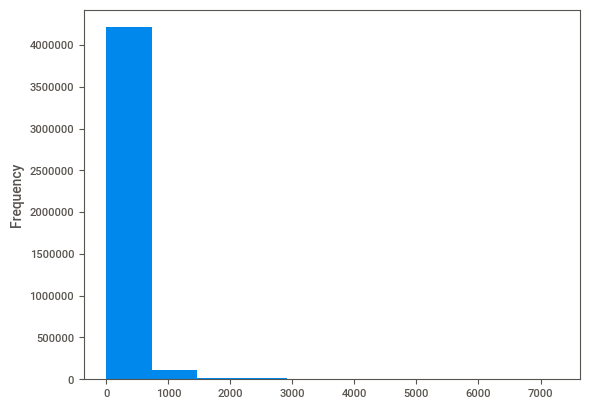

In [ ]:
df_19["val_geracao"].plot(kind = 'hist', bins = 10)

<Axes: ylabel='Frequency'>

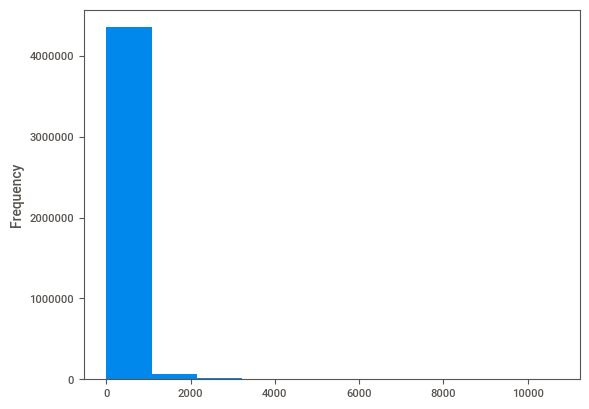

In [ ]:
df_20["val_geracao"].plot(kind = 'hist', bins = 10)

<Axes: xlabel='val_geracao', ylabel='Count'>

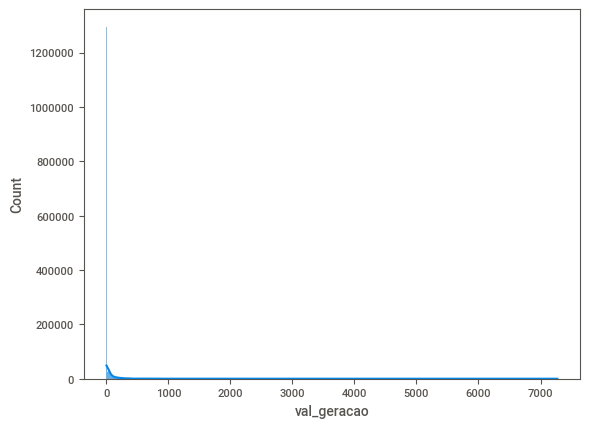

In [ ]:
sns.histplot(data = df_19,
            x = "val_geracao",
            kde = True)

<Axes: xlabel='val_geracao', ylabel='Count'>

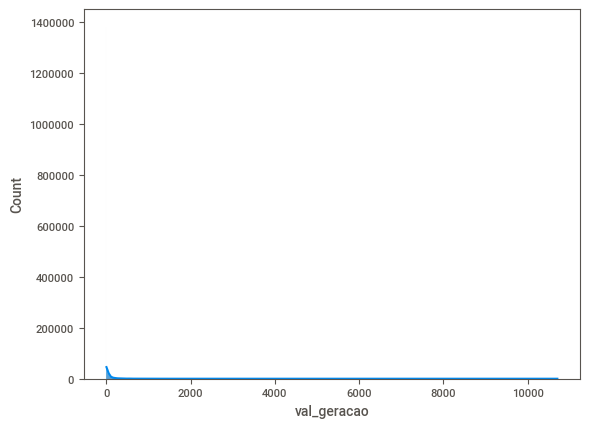

In [ ]:
sns.histplot(data = df_20,
            x = "val_geracao",
            kde = True)

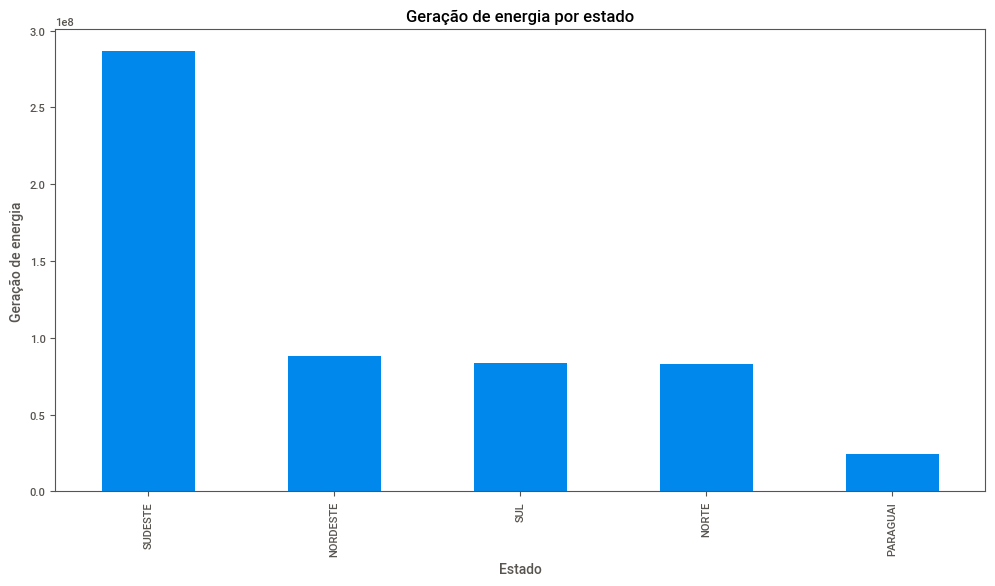

In [ ]:
# Agrupar os dados por estado e somar a quantidade de energia gerada
geration_by_system1 = df_19.groupby('nom_subsistema')['val_geracao'].sum().sort_values(ascending=False)

# Criar um gráfico de barras
plt.figure(figsize=(12, 6))
geration_by_system1.plot(kind='bar')
plt.title('Geração de energia por estado')
plt.xlabel('Estado')
plt.ylabel('Geração de energia')
plt.show()

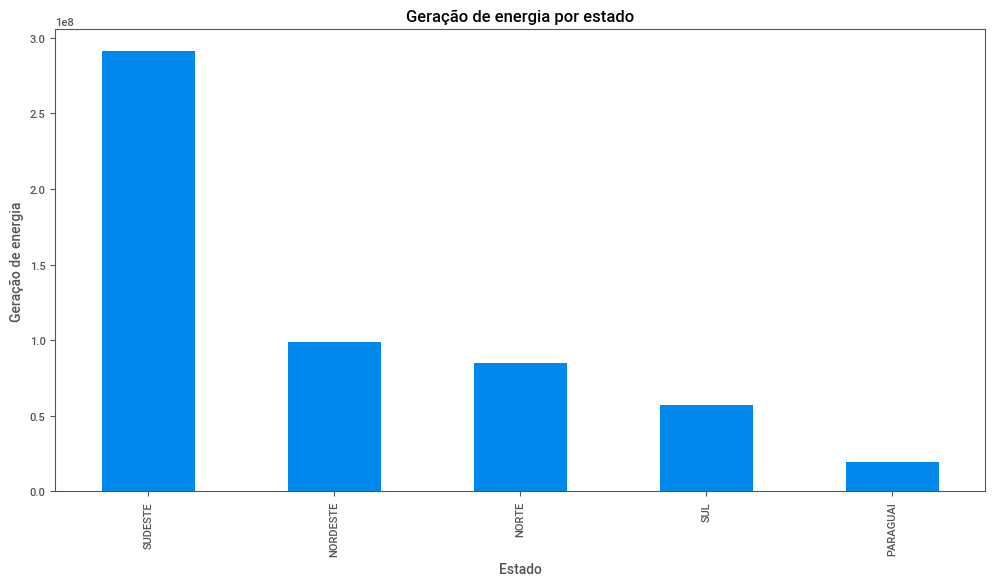

In [ ]:
# Agrupar os dados por estado e somar a quantidade de energia gerada
geration_by_system = df_20.groupby('nom_subsistema')['val_geracao'].sum().sort_values(ascending=False)

# Criar um gráfico de barras
plt.figure(figsize=(12, 6))
geration_by_system.plot(kind='bar')
plt.title('Geração de energia por estado')
plt.xlabel('Estado')
plt.ylabel('Geração de energia')
plt.show()

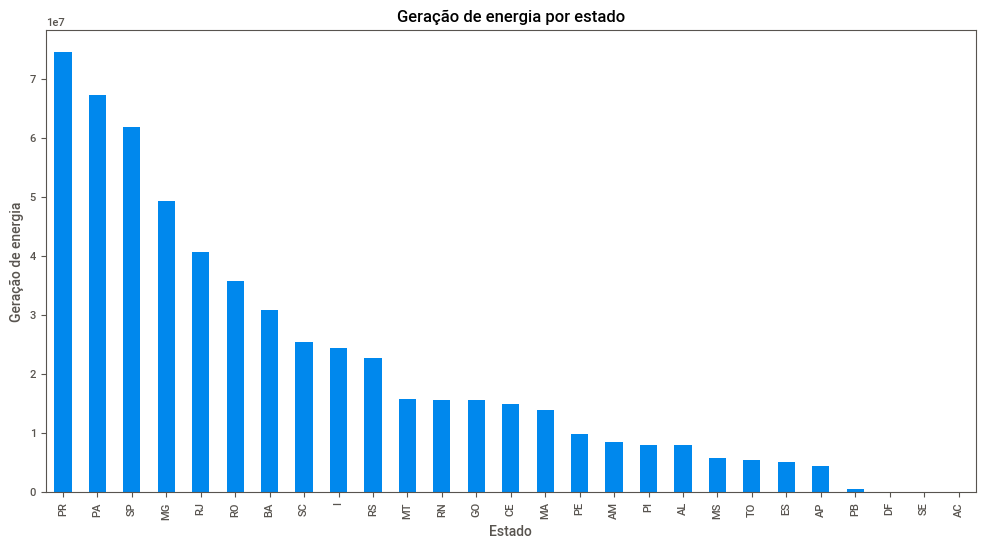

In [ ]:
# Agrupar os dados por estado e somar a quantidade de energia gerada
geration_by_state1 = df_19.groupby('id_estado')['val_geracao'].sum().sort_values(ascending=False)

# Criar um gráfico de barras
plt.figure(figsize=(12, 6))
geration_by_state1.plot(kind='bar')
plt.title('Geração de energia por estado')
plt.xlabel('Estado')
plt.ylabel('Geração de energia')
plt.show()

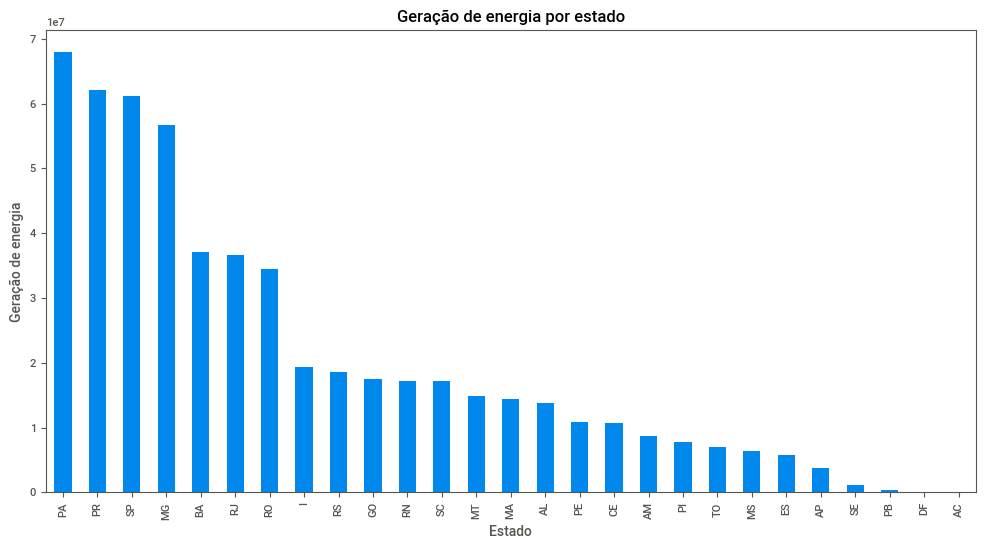

In [ ]:
# Agrupar os dados por estado e somar a quantidade de energia gerada
geration_by_state = df_20.groupby('id_estado')['val_geracao'].sum().sort_values(ascending=False)

# Criar um gráfico de barras
plt.figure(figsize=(12, 6))
geration_by_state.plot(kind='bar')
plt.title('Geração de energia por estado')
plt.xlabel('Estado')
plt.ylabel('Geração de energia')
plt.show()

<ipython-input-82-afef0f0a30bd>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = df_19.groupby('nom_subsistema')['nom_tipocombustivel', 'val_geracao'].max().reset_index()


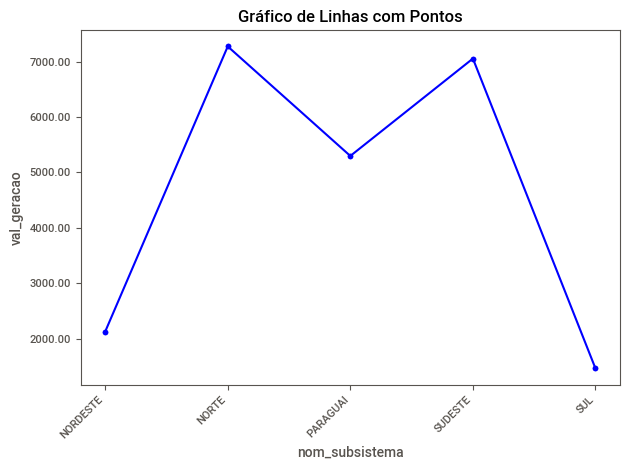

In [ ]:
import matplotlib.pyplot as plt

# Agrupa por estados
df = df_19.groupby('nom_subsistema')['nom_tipocombustivel', 'val_geracao'].max().reset_index()

# Define os dados
nom_subsistema = df['nom_subsistema']
val_geracao = df['val_geracao']

# Cria o gráfico de linhas com pontos
fig, ax = plt.subplots()

# Adiciona as linhas
ax.plot(nom_subsistema, val_geracao, marker='o', color='b', linestyle='-')

# Adiciona os pontos
ax.scatter(nom_subsistema, val_geracao, color='b')

# Configuração do eixo y como float usando matplotlib.ticker
import matplotlib.ticker as ticker
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

# Rotaciona os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45, ha='right')

# Adiciona rótulos e título
plt.xlabel('nom_subsistema')
plt.ylabel('val_geracao')
plt.title('Gráfico de Linhas com Pontos')

# Exibe o gráfico
plt.tight_layout()
plt.show()

<ipython-input-83-cd0e75e7677f>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = df_20.groupby('nom_subsistema')['nom_tipocombustivel', 'val_geracao'].max().reset_index()


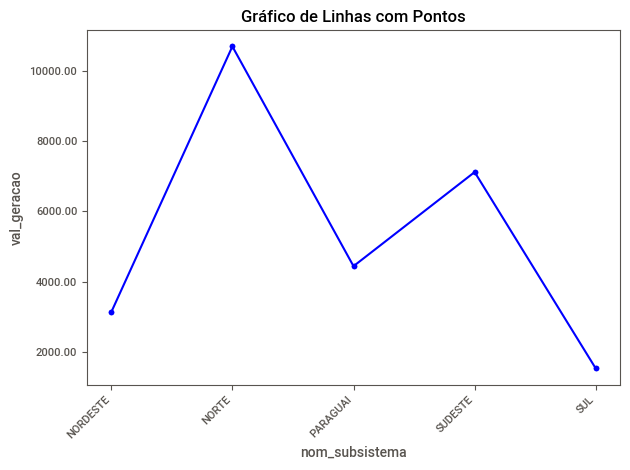

In [ ]:
import matplotlib.pyplot as plt

# Agrupa por estados
df = df_20.groupby('nom_subsistema')['nom_tipocombustivel', 'val_geracao'].max().reset_index()

# Define os dados
nom_subsistema = df['nom_subsistema']
val_geracao = df['val_geracao']

# Cria o gráfico de linhas com pontos
fig, ax = plt.subplots()

# Adiciona as linhas
ax.plot(nom_subsistema, val_geracao, marker='o', color='b', linestyle='-')

# Adiciona os pontos
ax.scatter(nom_subsistema, val_geracao, color='b')

# Configuração do eixo y como float usando matplotlib.ticker
import matplotlib.ticker as ticker
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

# Rotaciona os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45, ha='right')

# Adiciona rótulos e título
plt.xlabel('nom_subsistema')
plt.ylabel('val_geracao')
plt.title('Gráfico de Linhas com Pontos')

# Exibe o gráfico
plt.tight_layout()
plt.show()

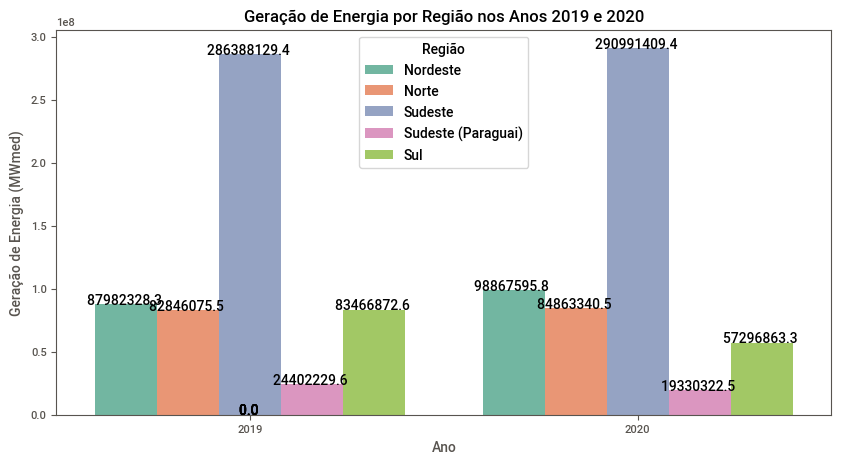

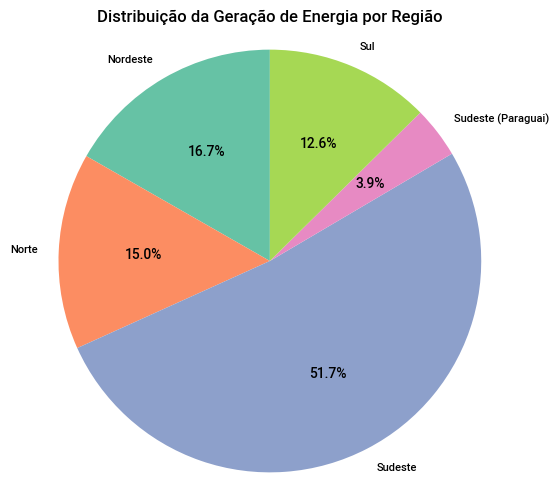

In [ ]:
#Vando

# Leitura
df_19 = pd.read_csv('GERACAO_USINA_2019.csv', delimiter=';')
df_20 = pd.read_csv('GERACAO_USINA_2020.csv', delimiter=';')

# Unir dataframes
df = pd.concat([df_19, df_20])

# Separar colunas
df.columns = df.columns.str.split(';').str[0]

# Converter a coluna 'din_instante' para o formato de data
df['din_instante'] = pd.to_datetime(df['din_instante'])

# Extrair os anos
df['ano'] = df['din_instante'].dt.year

regioes = {
    ('N', 'NORTE'): 'Norte',
    ('NE', 'NORDESTE'): 'Nordeste',
    ('S', 'SUL'): 'Sul',
    ('SE', 'SUDESTE'): 'Sudeste',
    ('SE', 'PARAGUAI'): 'Sudeste (Paraguai)',
}
df['regiao'] = df[['id_subsistema', 'nom_subsistema']].apply(lambda row: regioes.get((row['id_subsistema'], row['nom_subsistema'])), axis=1)

# Agrupamento por ano, região e calculo da soma da geração de energia
grouped_df = df.groupby(['ano', 'regiao'])['val_geracao'].sum().reset_index()

# gráfico por região
plt.figure(figsize=(10, 5))
sns.barplot(data=grouped_df, x='ano', y='val_geracao', hue='regiao', palette='Set2')

# Valor em MWmed acima das barras
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 10, f'{height:.1f} ', ha='center')

plt.xlabel('Ano')
plt.ylabel('Geração de Energia (MWmed)')
plt.title('Geração de Energia por Região nos Anos 2019 e 2020')
plt.legend(title='Região')
plt.show()

# Geração de energia por região
plt.figure(figsize=(6, 6))
grouped_df_pie = df.groupby('regiao')['val_geracao'].sum().reset_index()
plt.pie(grouped_df_pie['val_geracao'], labels=grouped_df_pie['regiao'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title('Distribuição da Geração de Energia por Região')
plt.axis('equal')
plt.show()

               regiao         mean     median         std
0            Nordeste    63.024412    19.6690  157.317560
1               Norte   228.407902    25.5500  815.627045
2             Sudeste   150.833713    33.3800  432.945855
3  Sudeste (Paraguai)  2499.002972  2381.4225  762.678831
4                 Sul   110.494966    28.2920  211.697079


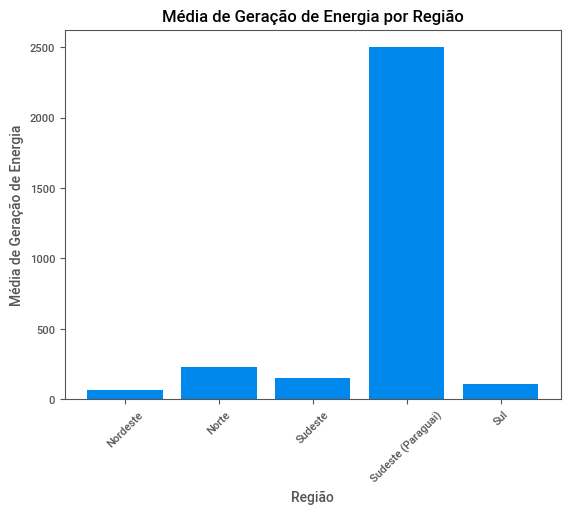

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Leitura dos arquivos CSV
df_2019 = pd.read_csv('GERACAO_USINA_2019.csv', delimiter=';')
df_2020 = pd.read_csv('GERACAO_USINA_2020.csv', delimiter=';')

# União dos dataframes
df = pd.concat([df_2019, df_2020])

# Separar as colunas corretamente
df.columns = df.columns.str.split(';').str[0]

# Mapear as regiões
regioes = {
    ('N', 'NORTE'): 'Norte',
    ('NE', 'NORDESTE'): 'Nordeste',
    ('S', 'SUL'): 'Sul',
    ('SE', 'SUDESTE'): 'Sudeste',
    ('SE', 'PARAGUAI'): 'Sudeste (Paraguai)',
}
df['regiao'] = df[['id_subsistema', 'nom_subsistema']].apply(lambda row: regioes.get((row['id_subsistema'], row['nom_subsistema'])), axis=1)

# Calcular a média, mediana e desvio padrão da geração de energia para cada região
df_variacao = df.groupby('regiao')['val_geracao'].agg(['mean', 'median', 'std']).reset_index()

print(df_variacao)

# Fráfico de barras comparando a média de geração de energia entre as regiões
plt.bar(df_variacao['regiao'], df_variacao['mean'])
plt.xlabel('Região')
plt.ylabel('Média de Geração de Energia')
plt.title('Média de Geração de Energia por Região')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8851365 entries, 0 to 4456794
Data columns (total 13 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   din_instante            object 
 1   id_subsistema           object 
 2   nom_subsistema          object 
 3   id_estado               object 
 4   nom_estado              object 
 5   cod_modalidadeoperacao  object 
 6   nom_tipousina           object 
 7   nom_tipocombustivel     object 
 8   nom_usina               object 
 9   ceg                     object 
 10  val_geracao             float64
 11  id_ons                  object 
 12  regiao                  object 
dtypes: float64(1), object(12)
memory usage: 945.4+ MB


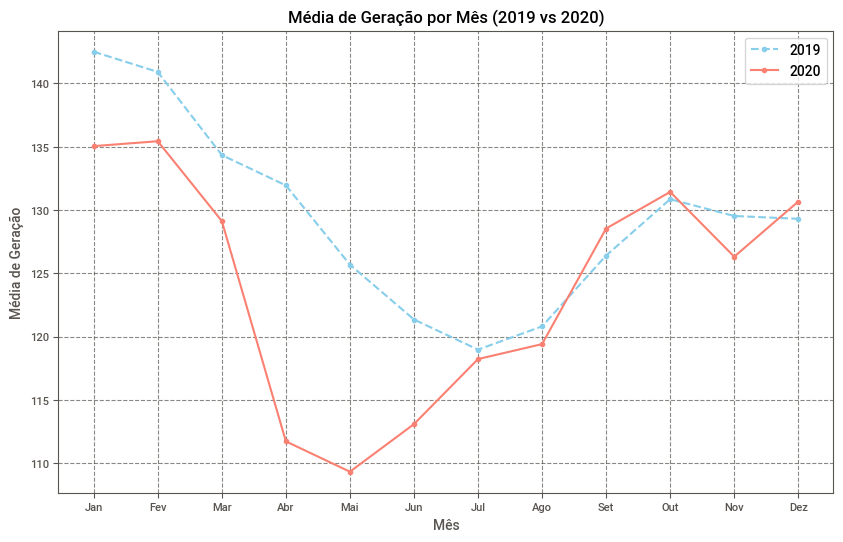

In [ ]:

df_19['din_instante'] = pd.to_datetime(df_19['din_instante'])
df_20['din_instante'] = pd.to_datetime(df_20['din_instante'])

df_19['mes'] = df_19['din_instante'].dt.month
df_20['mes'] = df_20['din_instante'].dt.month

df_19 = df_19.dropna(subset=['val_geracao'])
df_20 = df_20.dropna(subset=['val_geracao'])

media_19 = df_19[df_19['din_instante'].dt.year == 2019].groupby('mes')['val_geracao'].mean()
media_20 = df_20[df_20['din_instante'].dt.year == 2020].groupby('mes')['val_geracao'].mean()

meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

plt.figure(figsize=(10, 6))

plt.plot(media_19.index, media_19.values, label='2019', color='skyblue', linestyle='dashed', marker='o')
plt.plot(media_20.index, media_20.values, label='2020', color='salmon', marker='o')

plt.xticks(range(1, 13), meses)
plt.xlabel('Mês')
plt.ylabel('Média de Geração')
plt.title('Média de Geração por Mês (2019 vs 2020)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()


# O teorema de Bayes atualiza probabilidades com novas evidências. Aplicado aqui, compara médias de energia em 2019 e 2020 para inferir mudanças.

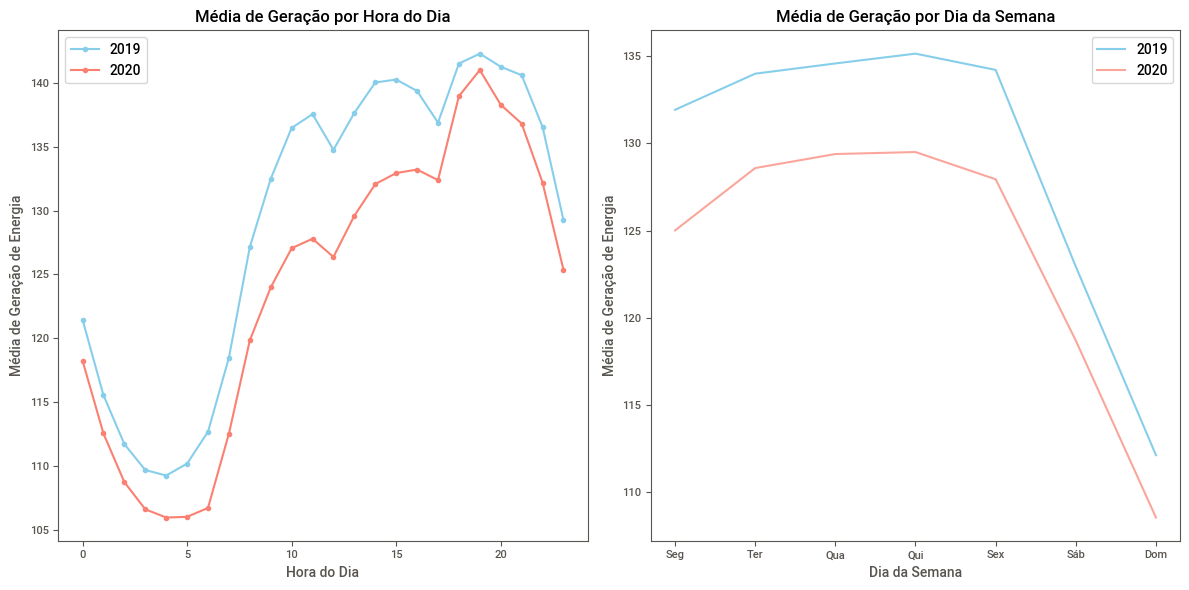

In [ ]:
df_19['din_instante'] = pd.to_datetime(df_19['din_instante'])
df_20['din_instante'] = pd.to_datetime(df_20['din_instante'])

df_19['hora_do_dia'] = df_19['din_instante'].dt.hour
df_19['dia_da_semana'] = df_19['din_instante'].dt.dayofweek

df_20['hora_do_dia'] = df_20['din_instante'].dt.hour
df_20['dia_da_semana'] = df_20['din_instante'].dt.dayofweek

media_hora_19 = df_19.groupby('hora_do_dia')['val_geracao'].mean()
media_dia_19 = df_19.groupby('dia_da_semana')['val_geracao'].mean()

media_hora_20 = df_20.groupby('hora_do_dia')['val_geracao'].mean()
media_dia_20 = df_20.groupby('dia_da_semana')['val_geracao'].mean()


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(media_hora_19.index, media_hora_19.values, label='2019', color='skyblue', marker='o')
plt.plot(media_hora_20.index, media_hora_20.values, label='2020', color='salmon', marker='o')
plt.xlabel('Hora do Dia')
plt.ylabel('Média de Geração de Energia')
plt.title('Média de Geração por Hora do Dia')
plt.legend()

plt.subplot(1, 2, 2)
dias_semana = ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom']
plt.plot(media_dia_19.index, media_dia_19.values, color='skyblue', label='2019')
plt.plot(media_dia_20.index, media_dia_20.values, color='salmon', label='2020', alpha=0.7)
plt.xlabel('Dia da Semana')
plt.ylabel('Média de Geração de Energia')
plt.title('Média de Geração por Dia da Semana')
plt.xticks(range(7), dias_semana)
plt.legend()

plt.tight_layout()
plt.show()
